# Homework 1
## Mason Smith

In [53]:

# https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
# Import data and packages
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("Raisin_Dataset/Raisin_Dataset.csv", delimiter=",", dtype=object)
X[1:,:-1] = X[1:,:-1].astype(float)
print(f'Shape{X.shape}')
print(X[0:2,:])
labels = X[0,:].tolist()

Shape(901, 8)
[['Area' 'MajorAxisLength' 'MinorAxisLength' 'Eccentricity' 'ConvexArea'
  'Extent' 'Perimeter' 'Class']
 [87524.0 442.2460114 253.291155 0.819738392 90546.0 0.758650579 1184.04
  'Kecimen']]


# Part 1

### 1. What is the number of classes in this dataset? (2 pts)
ANS: There are 2 classes: Kecimen and Besni raisin.

### 2. Calculate the log odds for the data. Write the discriminant function in terms of the log odds. (6 pts)
Log Odds: $log\frac{P(C_1|\mathbf{x})}{P(C_2|\mathbf{x})}$
Let: $C_1$ be Kecimen and $C_2$ be Besni

In [54]:
N = X[1:,:-1].shape[0]
P1 = np.sum((X[:,-1]=='Kecimen').astype(int))/N
P2 = np.sum((X[:,-1]=='Besni').astype(int))/N
LO = np.log(P1/P2)
print(f'Log Odds = {LO}')

Log Odds = 0.0


Discriminant:
- let $g(x) = log\frac{P(C_1|\mathbf{x})}{P(C_2|\mathbf{x})}$
- choose $c_1$ if $g(x)>0$ and $c_2$ otherwise

### 3. Assume that the input attributes are multivariate normal. Further assume that the input attributes in each class follow a different multivariate distribution. Calculate the mean vector and covariance matrix for the input attributes in each class. (Hint: consider your answer in 1. You should obtain this many sets of mean vector and covariance matrix.) (8 pts)

- Mean: $m_i = \frac{1}{N_i}\sum x_i$
- Cov: $S_i =(X_i - m_i)(X_i - m_i)^T$

In [55]:
# C = 'Kecimen' # class
Si = []
mi = []

for i, C in enumerate(['Kecimen','Besni']):
    ic = np.where(X[:,-1]==C)[0]#.flatten()
    Xi = X[ic,:-1].astype(float) # Input attributes for class c
    _mi = np.mean(Xi,axis=0) # mean vector
    _Si = np.cov(Xi.T) # covariance
    Si.append(_Si)
    mi.append(_mi)

    print('\n\n################################')
    print(f'###### FOR CLASS [{C}] #####')
    print(f'\nMean {_mi}')
    print(f"\nCovariance matrix of S \in {_Si.shape}\n {_Si}")



################################
###### FOR CLASS [Kecimen] #####

Mean [6.34134667e+04 3.52859249e+02 2.29352592e+02 7.41959536e-01
 6.56963556e+04 7.07774246e-01 9.83686236e+02]

Covariance matrix of S \in (7, 7)
 [[ 3.14273786e+08  9.48747383e+05  5.26930055e+05  1.22544439e+02
   3.34178076e+08 -2.07582479e+00  2.54722952e+06]
 [ 9.48747383e+05  3.55353016e+03  1.18448636e+03  2.51733540e+00
   1.03802111e+06 -5.20182414e-01  8.54753908e+03]
 [ 5.26930055e+05  1.18448636e+03  1.15999213e+03 -1.20695931e+00
   5.46132789e+05  3.02579660e-01  3.86602972e+03]
 [ 1.22544439e+02  2.51733540e+00 -1.20695931e+00  8.53068902e-03
   1.67623514e+02 -1.48948577e-03  2.94190389e+00]
 [ 3.34178076e+08  1.03802111e+06  5.46132789e+05  1.67623514e+02
   3.61223925e+08 -4.86447443e+01  2.79465818e+06]
 [-2.07582479e+00 -5.20182414e-01  3.02579660e-01 -1.48948577e-03
  -4.86447443e+01  1.88722736e-03 -1.03066330e+00]
 [ 2.54722952e+06  8.54753908e+03  3.86602972e+03  2.94190389e+00
   2.79465818e

## 4. Given  your  answer  in  3,  generate 10  samples from  each  of  the  multivariate  distributions.  (Hints:  the number of samples generated should be 10 times number of classes.) (10 pts)


In [56]:
Samples_i = []
for i, C in enumerate(['Kecimen','Besni']):
    samples_i = np.random.multivariate_normal(mi[i], Si[i],size=10)
    print(f'\n\nSamples for Ci={C} with shape {samples_i.shape}')
    print(samples_i)
    Samples_i.append(samples_i)



Samples for Ci=Kecimen with shape (10, 7)
[[7.43180710e+04 4.14692507e+02 2.36551982e+02 7.62941333e-01
  7.97525613e+04 6.94421631e-01 1.11883766e+03]
 [8.71253130e+04 4.15978882e+02 2.79230925e+02 6.74363499e-01
  9.09960830e+04 6.76734587e-01 1.18062299e+03]
 [3.41042961e+04 2.80953871e+02 1.74613179e+02 7.25965966e-01
  3.57095467e+04 6.87021553e-01 7.55642017e+02]
 [6.72231978e+04 3.61905310e+02 2.37997563e+02 7.33155373e-01
  7.34605474e+04 7.39292488e-01 1.03924157e+03]
 [5.32056220e+04 3.28615567e+02 2.02197693e+02 7.71437524e-01
  5.58895757e+04 6.76982028e-01 8.97156241e+02]
 [4.62996670e+04 2.95267260e+02 2.11142990e+02 6.94258065e-01
  4.65716101e+04 6.62092338e-01 8.61650202e+02]
 [5.56324132e+04 3.09611977e+02 2.18705870e+02 6.98180791e-01
  5.72965523e+04 7.48150652e-01 8.75210840e+02]
 [6.24277372e+04 3.28780921e+02 2.44818774e+02 6.01148258e-01
  6.46764242e+04 7.31271883e-01 9.65960443e+02]
 [7.89372488e+04 3.93828910e+02 2.62860637e+02 7.06840965e-01
  8.17897324e+

## 5.  Given  the  assumption  that  input  attributes  are  multivariate  normal,  visualize  the  joint  distribution  of “MajorAxisLength”  and  “MinorAxisLength” for   each   class. Based  on  the  “multivariate  normal” assumption,  do  you  think  that “MajorAxisLength” and “MinorAxisLength” are  both univariate normal, and why? (Hint: use your results from 3 and visualize the parametric form of distribution. Create grids for [0,800]×[0,800] for 3D plots.) (10 pts)

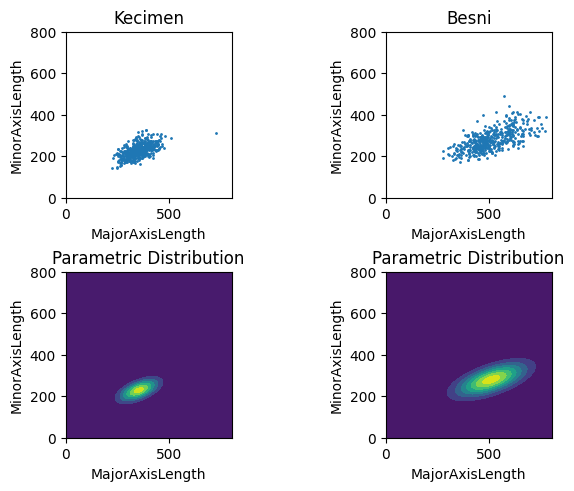

In [57]:
def problem_5():
    from scipy.stats import multivariate_normal
    fig,axs = plt.subplots(2,2,constrained_layout=True)
    for i, C in enumerate(['Kecimen','Besni']):
        xmin = 0
        xmax = 800
        # Plot scatterplot
        ic = np.where(X[:,-1]==C)[0]#.flatten()
        Xi = X[ic,:-1].astype(float) # Input attributes for class c
        xi_MajorAxisLength = Xi[:,1]
        xi_MinorAxisLength = Xi[:,2]
        axs[0,i].scatter(xi_MajorAxisLength,xi_MinorAxisLength,s=1)
        axs[0,i].set_title(C)
        axs[0,i].set_xlabel('MajorAxisLength')
        axs[0,i].set_ylabel('MinorAxisLength')
        axs[0,i].set_xlim([xmin,xmax])
        axs[0,i].set_ylim([xmin,xmax])
        axs[0,i].set_aspect('equal', adjustable='box')


        # use your results from 3 and visualize the parametric form of distribution. Create grids for [0,800]×[0,800] for 3D plots.
        mean = mi[i][1:3]
        covariance_matrix = Si[i][[1,2],:][:,[1,2]]
        x, y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(xmin, xmax, 100))
        pos = np.dstack((x, y))
        pdf_values = multivariate_normal.pdf(pos, mean=mean, cov=covariance_matrix)
        axs[1,i].contourf(x, y, pdf_values, cmap='viridis')
        axs[1,i].set_xlabel('MajorAxisLength')
        axs[1,i].set_ylabel('MinorAxisLength')
        axs[1,i].set_title('Parametric Distribution')
        axs[1,i].set_xlim([xmin,xmax])
        axs[1,i].set_ylim([xmin,xmax])
        axs[1,i].set_aspect('equal', adjustable='box')
    plt.show()
problem_5()

Since the input data is multi-variate normal, the MajorAxisLength and MinorAxisLength are both univariate normal as confirmed by the above plots.

## 6. Given your answers in 3,write the functional form of the likelihood ratio. You may define notations for the mean and covariance of each class. (6 pts)

- Let: $C_1$ be Kecimen and $C_2$ be Besni
- Likelihood Ratio: $\frac{p(x|C_1)}{p(x|C_2)}$
- $ p(\mathbf{x}|C_1) = \frac{1}{(2\pi)^{d/2}|\Sigma_1|^{1/2}}   exp\Big(-\frac{1}{2}(\mathbf{x}-\mu_1)^T \Sigma_1^{-1} (\mathbf{x}-\mu_1)\Big)$
- $ p(\mathbf{x}|C_2) = \frac{1}{(2\pi)^{d/2}|\Sigma_2|^{1/2}}   exp\Big(-\frac{1}{2}(\mathbf{x}-\mu_2)^T \Sigma_2^{-1} (\mathbf{x}-\mu_2)\Big)$

## 7.  Given  your  answers  in  3  and  6,  write  the discriminant function for  each  class.  Then,  calculate  the discriminant functions it for each sample point and label each of them with the class name. (Hint: see Eq. (4.20) in textbook. The “label” here is based on your calculated discriminant. You may store the labels in an Excel or .csv file.) (10 pts)


Eq. (4.20): $g_i(x) = log\;p(x|C_i) + log \;P(C_i)$
Assume $p(x|C_i)$ is Gaussian (from problem 6)
We get discriminant function: $g_i(x) = -\frac{1}{2}log(2\pi)-log(\sigma_i^2)+log(P(C_i))$

$g_i(\mathbf{x})= log\;p(\mathbf{x}|C_i) + log \;P(C_i) = -\frac{d}{2}log(2\pi)-\frac{1}{2}log|\Sigma_i|-\frac{1}{2}(\mathbf{x}-\mu_i)^T \Sigma_i^{-1} (\mathbf{x}-\mu_i) + log(P(C_i))$

Sample Discriminant
$g_i(\mathbf{x})= -\frac{1}{2}log|S_i|-\frac{1}{2}(\mathbf{x}-m_i)^T S_i^{-1} (\mathbf{x}-m_i) + log(P(C_i))$

In [58]:
def problem_7():
    rt = [] # true label
    rhat_t = [] # predicted label
    P_Ci = 0.5 # prob of observing class i
    for t in range(N):
        # Get sample
        xt = X[t+1,:-1].astype(float)

        # Clac Discriminant for each class i
        gi = [None,None]
        for i in range(2):
            term1 = -0.5*np.log(np.linalg.det(Si[i]))
            term2 = -0.5*(xt-mi[i]) @ np.linalg.inv(Si[i]) @ (xt -mi[i]).T
            term3 =  np.log(P_Ci)
            gi[i] = term1+term2+term3

        # Store prediciton and true label
        rt.append( 0 if X[t+1,-1]=="Kecimen" else 1) # true label
        rhat = np.argmax(gi)
        rhat_t.append(rhat)
    # accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
    # print(f'Perc. Correct: {accuracy}')
    # print(rhat_t) print(rt)
    return rt, rhat_t
rt,rhat_t = problem_7()
accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
print(f'Perc. Correct: {accuracy}')

Perc. Correct: 0.86


## 8. Given your answers in 3 and 6, if poolingthe covariance of all classes, write the discriminantfunction for eachclass. Then, calculate the discriminant functions it for each sample point and label each of them with the class name. (Hint: see Eq. (5.21) and (5.22) in textbook. The “label” here is based on your calculated discriminant. You may store the labels in an Excel or .csv file.) (10 pts)

Another possibility is to pool the data and estimate a common covariance matrix for all classes:
- $\mathbf{S}=\sum_i \hat{P}(C_i)S_i$
- (5.19) reduces to $g_i(\mathbf{x})=-\frac{1}{2}(\mathbf{x}-m_i)^T S^{-1}(\mathbf{x}-m_i) + log \hat{P}(C_i)$


In [59]:
def problem_8():
    Phat_Ci = [0.5,0.5] # prob of observing class i
    S_pooled = (Phat_Ci[0])*Si[0] + (Phat_Ci[1])*Si[1]

    rt = [] # true label
    rhat_t = [] # predicted label
    for t in range(N):
        # Get sample
        xt = X[t+1,:-1].astype(float)


        # Clac Discriminant for each class i
        gi = [None,None]
        for i in range(2):
            term1 = -0.5*(xt-mi[i]) @ np.linalg.inv(S_pooled) @ (xt -mi[i]).T
            term2 =  np.log(Phat_Ci[i])
            gi[i] = term1+term2

        # Store prediciton and true label
        rt.append( 0 if X[t+1,-1]=="Kecimen" else 1) # true label
        rhat = np.argmax(gi)
        rhat_t.append(rhat)
    accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
    # print(f'Perc. Correct: {accuracy}')
    # print(rhat_t) print(rt)
    return rt, rhat_t
rt,rhat_t = problem_8()
accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
print(f'Perc. Correct: {accuracy}')

Perc. Correct: 0.86


## 9.  Use  a confusion  matrix to  show  the  classification  results  with  the discriminantfunctionin  7  and  8, respectively. Calculate the classification accuracy for both and compare the results.Briefly describe your findings.(Hint: you will obtain 2 confusion matrices, one for the result in 7 and the other for 8.) (8 pts)

In [60]:
def problem_1_9():
    from sklearn.metrics import confusion_matrix
    rt,rhat_t = problem_7()
    CM = confusion_matrix(rt, rhat_t)
    print()
    pc_i = [None,None] # percent correct for class i
    for i in range(2):
        nc = CM[i,i] # number of correct
        Ni = np.sum(CM[i,:]) # total in class
        pc_i[i] = nc/Ni # percent correct
    acuraccy = np.mean(pc_i)
    print(f'######## From Problem 7 ##############')
    print(f'Confusion Matrix: \n{CM}')
    print(f'Accuracy per class: {np.round(pc_i,2)}')
    print(f'Classification Accuracy: {np.round(acuraccy,2)}')


    rt,rhat_t = problem_8()
    CM = confusion_matrix(rt, rhat_t)
    print()
    pc_i = [None,None] # percent correct for class i
    for i in range(2):
        nc = CM[i,i] # number of correct
        Ni = np.sum(CM[i,:]) # total in class
        pc_i[i] = nc/Ni # percent correct
    acuraccy = np.mean(pc_i)
    print(f'######## From Problem 8 ##############')
    print(f'Confusion Matrix: \n{CM}')
    print(f'Accuracy per class: {np.round(pc_i,2)}')
    print(f'Classification Accuracy: {np.round(acuraccy,2)}')

    print(f'\n\nDiscussion: Problem 7 formulation correctly classified Kecimen more but incorrectly classified Bensi more also whereas Problem 8 was more balanced. However, total prediction accuracy across both formulations was the same.')
problem_1_9()


######## From Problem 7 ##############
Confusion Matrix: 
[[430  20]
 [106 344]]
Accuracy per class: [0.96 0.76]
Classification Accuracy: 0.86

######## From Problem 8 ##############
Confusion Matrix: 
[[392  58]
 [ 68 382]]
Accuracy per class: [0.87 0.85]
Classification Accuracy: 0.86


Discussion: Problem 7 formulation correctly classified Kecimen more but incorrectly classified Bensi more also whereas Problem 8 was more balanced. However, total prediction accuracy across both formulations was the same.


----------
# Part 2 (60 pts)
Do  4-fold  cross  validation  for  the  data set and  perform  classification  analysis:
(1)  randomly  shuffle  the samples,
(2) partition the data into 4 folds,
(3) choose 3 out of the 4 folds as training data and the rest 1 as testing data (you can do this for 4 times by choosing 3 different folds each time)

For each of the 4 replicates, do the following:

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def partition_4fold():
    N = 900
    data = np.loadtxt("Raisin_Dataset/Raisin_Dataset.csv", delimiter=",", dtype=object)[1:,:]
    data[np.where(data[:, -1] == 'Kecimen'),-1] = 0
    data[np.where(data[:, -1] == 'Besni'),-1] = 1
    data[:,:-1] = data[:,:-1].astype(float)
    # np.random.shuffle(data)
    Xt = data[:,:-1].astype(float)
    rt = data[:,-1].reshape([N,1]).astype(int)

    Xt_4fold = [Xt[int((f)*(N/4)):int((f+1)*(N/4)),:] for f in range(4)]
    rt_4fold = [rt[int((f)*(N/4)):int((f+1)*(N/4)),:] for f in range(4)]
    return Xt_4fold,rt_4fold
Xt_4fold,rt_4fold = partition_4fold()

###################################################################
# Get train and test data
###################################################################
verbose = False
Confusion = {'fp':[],'fn':[],'tp':[],'tn':[]}
Confusion_pooled = {'fp':[],'fn':[],'tp':[],'tn':[]}

for iFold in range(4):
    if verbose:
        print(f'\n####### FOLD {iFold+1} ########')

    ifold_train = [0,1,2,3]
    ifold_train.remove(iFold)
    Xt = np.vstack([Xt_4fold[f] for f in ifold_train]).astype(float) # train input
    rt = np.vstack([rt_4fold[f] for f in ifold_train]).astype(int)  # train label
    N = Xt.shape[0]

    test_Xt = Xt_4fold[iFold].astype(float)  # test input
    test_rt = rt_4fold[iFold].astype(int) # train input
    test_N = test_Xt.shape[0]

    # Xt = np.vstack(Xt_4fold[0:3]).astype(float) # train input
    # rt = np.vstack(rt_4fold[0:3]).astype(int)  # train label
    # test_Xt = Xt_4fold[3].astype(float)  # test input
    # test_rt = rt_4fold[3].astype(int) # train input
    ###################################################################
    # 1.  Assume  that  the  input  attributes  are multivariate  normal.  Calculate  the  mean  vector  and  covariance matrix for the input attributes in each class using the training data. (10 pts)
    ###################################################################

    mi = [None, None] # sample mean
    Si = [None, None] # sample cov
    for i in range(2):
        Xti = Xt[np.where(rt==i)[0],:] # get class input
        mi[i] = np.mean(Xti,axis=0)
        Si[i] = np.cov(Xti.T)
    if verbose:
        print(f'Q1 --------------------------')
        for i in range(2):
            print(f'\nFor class {i}:')
            print(f'Mean:{np.round(mi[i],1)}')
            print(f'Cov \n{np.round(Si[i])}')
    ###################################################################
    # 2. Given your answers in 1, calculate the discriminant function for the testing data.
    # Then label each testing sample with the class name. Finally, create a confusion matrix
    # to show the classification result for testing data.(Hint: You may store the labels in
    # an Excel or .csv file.)(15 pts)
    ###################################################################

    rhat_t = []
    Phat_Ci = [0.5,0.5]
    for t in range(test_N):
        xt = test_Xt[t] # get sample
        # Clac Discriminant for each class i
        gi = [None,None]
        for i in range(2):
            term1 = -0.5*np.log(np.linalg.det(Si[i]))
            term2 = -0.5*(xt-mi[i]) @ np.linalg.inv(Si[i]) @ (xt -mi[i]).T
            term3 =  np.log(Phat_Ci[i])
            gi[i] = term1+term2+term3
        # Store prediciton and true label
        prediction = np.argmax(gi)
        rhat_t.append(prediction)

    ConfusionMatrix = confusion_matrix(test_rt, rhat_t)
    if verbose:
        print(f'\nQ2 --------------------------')
        print(f'Confusion Matrix \n {ConfusionMatrix}')

    ###################################################################
    # 3. Given your answers in 1, if pooling the covariance of all classes,
    # calculate the discriminant function for the testing data.
    # Then label each testing sample with the class name.
    # Finally, create a confusion matrix to show the classification result for testing data.
    # (Hint: You may store the labels in an Excel or .csv file.)(15 pts)
    ###################################################################
    S_pooled = (Phat_Ci[0])*Si[0] + (Phat_Ci[1])*Si[1]
    rhat_t = []
    for t in range(test_N):
        xt = test_Xt[t] # get sample
        # Clac Discriminant for each class i
        gi = [None,None]
        for i in range(2):
            term1 = -0.5*(xt-mi[i]) @ np.linalg.inv(S_pooled) @ (xt -mi[i]).T
            term2 =  np.log(Phat_Ci[i])
            gi[i] = term1+term2
        # Store prediciton and true label
        prediction = np.argmax(gi)
        rhat_t.append(prediction)
    ConfusionMatrix_pooled = confusion_matrix(test_rt, rhat_t)
    if verbose:
        print(f'\nQ3 (pooled) ----------------------')
        print(f'Confusion Matrix \n {ConfusionMatrix}')
    ###################################################################
    # 4. For the discriminant functions in 2 and 3, respectively,
    # calculate  the  average false positive rate, false negative  rate, true  positive  rate,  and true  negative  rate
    # for  the  classification  results  throughout  the  4 replicates that you have completed.
    # (Hint: you will get four rates for each classification method.) (15 pts)
    ###################################################################
    if verbose:
        print(f'\nQ4 -----------------------')
        fp = ConfusionMatrix[1,0] # false-positive
        fn = ConfusionMatrix[0,1] # false-negative
        tp = ConfusionMatrix[0,0] # true-positive
        tn = ConfusionMatrix[1,1] # true-negative
        print(f'Non-Pooled [fp,fn,tp,tn] = {[fp,fn,tp,tn]}')
        fp_pooled = ConfusionMatrix_pooled[1,0] # false-positive
        fn_pooled = ConfusionMatrix_pooled[0,1] # false-negative
        tp_pooled = ConfusionMatrix_pooled[0,0] # true-positive
        tn_pooled = ConfusionMatrix_pooled[1,1] # true-negative
        print(f'Pooled [fp,fn,tp,tn] = {[fp_pooled,fn_pooled,tp_pooled,tn_pooled]}')

    Confusion['fp'].append(ConfusionMatrix[1,0]) # false-positive
    Confusion['fn'].append(ConfusionMatrix[0,1]) # false-negative
    Confusion['tp'].append(ConfusionMatrix[0,0]) # true-positive
    Confusion['tn'].append(ConfusionMatrix[1,1]) # true-negative
    Confusion_pooled['fp'].append(ConfusionMatrix_pooled[1,0]) # false-positive
    Confusion_pooled['fn'].append(ConfusionMatrix_pooled[0,1]) # false-negative
    Confusion_pooled['tp'].append(ConfusionMatrix_pooled[0,0]) # true-positive
    Confusion_pooled['tn'].append(ConfusionMatrix_pooled[1,1]) # true-negative


fp = np.mean(Confusion['fp'])
fn = np.mean(Confusion['fn'])
tp = np.mean(Confusion['tp'])
tn = np.mean(Confusion['tn'])
print(f'Non-Pooled Average [fp,fn,tp,tn] = {[fp,fn,tp,tn]}')
print(f'Non-Pooled Accuracy = {(tp+tn)/np.sum([fp,fn,tp,tn])}')
fp = np.mean(Confusion_pooled['fp'])
fn = np.mean(Confusion_pooled['fn'])
tp = np.mean(Confusion_pooled['tp'])
tn = np.mean(Confusion_pooled['tn'])
print(f'Pooled Average [fp,fn,tp,tn] = {[fp,fn,tp,tn]}')
print(f'Pooled Accuracy = {(tp+tn)/np.sum([fp,fn,tp,tn])}')


Non-Pooled Average [fp,fn,tp,tn] = [27.0, 7.5, 105.0, 85.5]
Non-Pooled Accuracy = 0.8466666666666667
Pooled Average [fp,fn,tp,tn] = [17.5, 15.25, 97.25, 95.0]
Pooled Accuracy = 0.8544444444444445


### 5. Briefly describe the performance of each discrimination method and identify the best one for this dataset based on the average performance across 4-fold cross validation.(5 pts)
The non-pooled once again favored correctly identifying Kecimen in favor of incorrecly clasifying Besni.
However, this time the overall accuracy for the pooled version was better and is therfore better to use from the 4-fold results.


-----
# Part 3(70 pts)
For this part, take “Area”, “MajorAxisLength”, “MinorAxisLength”, “Electricity”, “Extent”, “Perimeter” as independent variables, and “ConvexArea” as dependent variables

### 1. Visualize “ConvexArea” against each independent variable and describe the trend and patterns in your plots. (Hints: you will get 6 plots, each with “Area” as the vertical axis and an independent variable as the horizontal axis.) (8 pts)

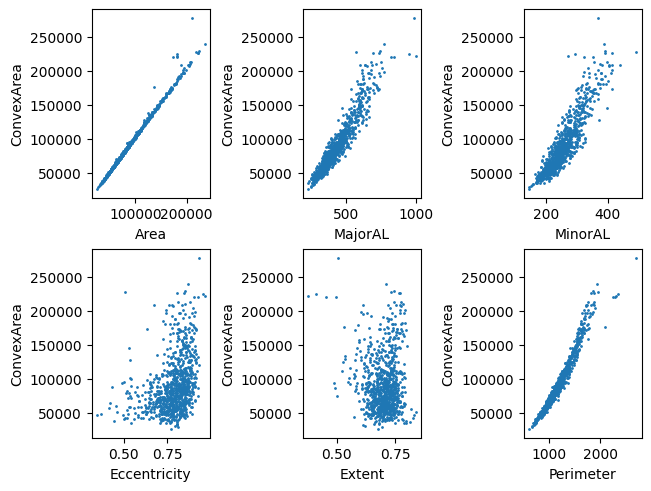

In [62]:
def import_data():
    N = 900
    data = np.loadtxt("Raisin_Dataset/Raisin_Dataset.csv", delimiter=",", dtype=object)[1:,:]
    data[np.where(data[:, -1] == 'Kecimen'),-1] = 0
    data[np.where(data[:, -1] == 'Besni'),-1] = 1
    data[:,:-1] = data[:,:-1].astype(float)
    # np.random.shuffle(data)
    Xt = data[:,:-1].astype(float)
    rt = data[:,-1].reshape([N,1]).astype(int)
    return Xt,rt
Xt,rt = import_data()
Area = Xt[:,0]
MajorAL = Xt[:,1]
MinorAL = Xt[:,2]
Eccentricity = Xt[:,3]
ConvexArea = Xt[:,4]
Extent = Xt[:,5]
Perimeter = Xt[:,6]

fig,axs = plt.subplots(2,3,constrained_layout=True)


r,c = 0,0; axs[r,c].scatter(Area,ConvexArea,s=1); axs[r,c].set_xlabel('Area'); axs[r,c].set_ylabel('ConvexArea')
r,c = 0,1; axs[r,c].scatter(MajorAL,ConvexArea,s=1); axs[r,c].set_xlabel('MajorAL'); axs[r,c].set_ylabel('ConvexArea')
r,c = 0,2; axs[r,c].scatter(MinorAL,ConvexArea,s=1); axs[r,c].set_xlabel('MinorAL'); axs[r,c].set_ylabel('ConvexArea')
r,c = 1,0; axs[r,c].scatter(Eccentricity,ConvexArea,s=1); axs[r,c].set_xlabel('Eccentricity'); axs[r,c].set_ylabel('ConvexArea')
r,c = 1,1; axs[r,c].scatter(Extent,ConvexArea,s=1); axs[r,c].set_xlabel('Extent'); axs[r,c].set_ylabel('ConvexArea')
r,c = 1,2; axs[r,c].scatter(Perimeter,ConvexArea,s=1); axs[r,c].set_xlabel('Perimeter'); axs[r,c].set_ylabel('ConvexArea')
plt.show()

There is a linear relationship between ConvexArea and [Area, MajorAL, MinorAL, and Perimeter] and not much of a relationship between eccentricity and extent.

### 2. Use the first 600 samples in the dataset as the training data and the rest as the testing data. Calculate the correlation matrix for all dependent and independent variables for the training data. Based on the correlation matrix, identify which independent variables have major impact to the dependent variable. Does the impact imply a causal relationship and why? (Hint: Save the correlations in an Excel or .csv file.) (8 pts)


In [63]:
train_Xt = Xt[:600,:]
d = 7
corr_mat = np.zeros([d,d])
for i in range(d):
    for j in range(d):
        corr_mat[i,j] = np.corrcoef(train_Xt[:,i],train_Xt[:,j])[0, 1]
print(np.round(corr_mat,5))
print(f'\nConvexArea Corr:{np.round(corr_mat[4,:],4)}')

[[ 1.       0.93361  0.88856  0.30033  0.99506 -0.11763  0.96388]
 [ 0.93361  1.       0.70054  0.54834  0.94691 -0.29956  0.97768]
 [ 0.88856  0.70054  1.      -0.10172  0.87337  0.08452  0.80862]
 [ 0.30033  0.54834 -0.10172  1.       0.3136  -0.41071  0.40507]
 [ 0.99506  0.94691  0.87337  0.3136   1.      -0.16052  0.97963]
 [-0.11763 -0.29956  0.08452 -0.41071 -0.16052  1.      -0.26105]
 [ 0.96388  0.97768  0.80862  0.40507  0.97963 -0.26105  1.     ]]

ConvexArea Corr:[ 0.9951  0.9469  0.8734  0.3136  1.     -0.1605  0.9796]


The most corralated IDV are [Area, MajorAL, MinorAL, and Perimeter] where causation is not implied since correlation does not imply causation.

### 3. Use Python to fit a linear regression model using the training data. Summarize the model coefficients. Based on the coefficients, which independent variables have more impact  to the dependent variable? (10 pts)

In [64]:
from sklearn.linear_model import LinearRegression
train_X = np.hstack([train_Xt[:,:4],train_Xt[:,5:d]])
train_y = train_Xt[:,4]
reg = LinearRegression().fit(train_X, train_y)
print(f'Coeff: {np.around(reg.coef_,2)}')

Coeff: [ 9.300000e-01 -8.927000e+01 -1.250100e+02 -1.448323e+04  1.019630e+03
  7.634000e+01]


Here. Eccentricity and Extent have the highest weights in the regression model.


### 4. Use the model fitted in 3 to make predictions for testing data. Calculate the mean squared errorfor the testing samples with respect to the predictions. Do you think the model has a good prediction performance? (Hint:  input  the  testing  samples  of  independent  variables  into  your  fitted  model  and  then  evaluate  the prediction against the true sample values of dependent variable.) (8 pts)

In [65]:
test_X = np.hstack([Xt[600:,:4],Xt[600:,5:d]])
test_y = Xt[600:,4]

pred_y = reg.predict(train_X)
MAE = np.mean(np.abs(train_y-pred_y))
MSE = np.mean(np.power(train_y-pred_y,2))
print(f'MSE over Training Samples: {round(MSE)}')
print(f'Mean Absolute Error Training: {round(MAE)}')



pred_y = reg.predict(test_X)
MAE = np.mean(np.abs(test_y-pred_y))
MSE = np.mean(np.power(test_y-pred_y,2))
print(f'\nMean Test Value: {round(np.mean(test_y))}')
print(f'MSE Test Value: {round(MSE)}')
print(f'Mean Percent Error Test Value: {round(MAE/np.mean(test_y),2)}')

MSE over Training Samples: 3283452
Mean Absolute Error Training: 1200

Mean Test Value: 113186
MSE Test Value: 4975404
Mean Percent Error Test Value: 0.01


That is fairly good performance since the magnitude of the y-value is so large. The mean deviation (absolute error) was about 1% which is good.

  ### 5. Based  on  result  in  3,  do  you  think  that  the  independent  variables  are  mutually  linearly  independent? What’s the influence on the linear regression model with the appearance of linear dependence among independent variables? (5 pts)
  No, the variables are not all mutually independant. I would expect a higher contribution of Area, due to the strong linear relationship with ConvexArea, in the regression weights but apparently the variance explained by Area is already explained, to a better degree, by other features since Area is linearly dependent on other features.

### 6. Perform Principal Component Analysis on the training data matrix of independent variables. Show the variance explained by each principal component. (6 pts)

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_X)
eigvecs = pca.components_
eigvals = pca.explained_variance_
print(f'Variance Explained (for each PC):\n{eigvals}')


Variance Explained (for each PC):
[1.18541399e+09 5.82831361e+03 6.84475923e+02 5.20560536e+01
 2.03580498e-03 1.66859749e-03]


### 7. Visualize a Pareto chart for the variance explained by each principal component. (10 pts)

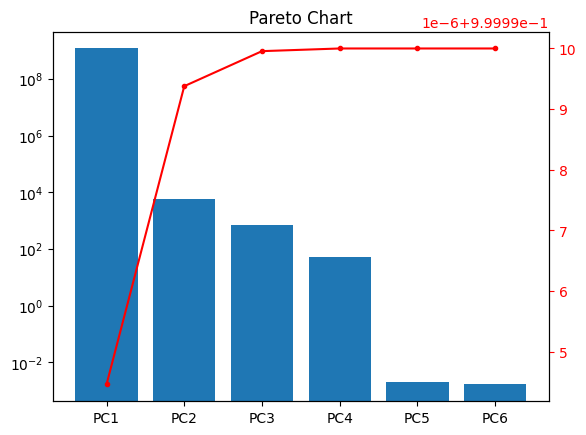

In [67]:
fig,ax = plt.subplots(1,1)
labels = [f'PC{iPC+1}' for iPC in range(len(eigvals))]

ax.set_title('Pareto Chart')
ax.bar(labels,eigvals)
ax.set_yscale("log")

PoV = [np.sum(eigvals[:iPC+1])/np.sum(eigvals) for iPC in range(len(eigvals))]
ax2 = ax.twinx()
ax2.plot(labels,PoV,c='red',marker='.')
ax2.tick_params(axis='y', colors='red')

 ### 8. Take the first 3 principal components from 7 and fit a multivariate regression model. Do prediction with the model for testing samples and calculate the mean squared error. (Hint: You need to transform the testing data to principal components as well.) (10 pts)

In [68]:
# train_X = np.hstack([train_Xt[:,:4],train_Xt[:,5:d]])
# train_y = train_Xt[:,4]
pca = PCA(n_components = 3)
pca.fit(train_X)
reg = LinearRegression().fit(pca.transform(train_X), train_y)

pred_y = reg.predict(pca.transform(test_X))
MAE = np.mean(np.abs(test_y-pred_y))
MSE = np.mean(np.power(test_y-pred_y,2))
print(f'\nMean Test Value: {round(np.mean(test_y))}')
print(f'MSE Test Value: {round(MSE)}')
print(f'Mean Percent Error Test Value: {round(MAE/np.mean(test_y),2)}')



Mean Test Value: 113186
MSE Test Value: 5941078
Mean Percent Error Test Value: 0.02


### 9.  Give  a  practical  scenario  when  you  will  use Principal  Component  Analysis to  reduce  the  data dimensionality before fitting a regression model; give a practical scenario when you will NOT use Principal Component  Analysis to reduce the  data  dimensionality  before  fitting  a  regression  model.  (Hint:  you  can name any data source and/or situations, which is not necessarily related to the Raison dataset.) (5 pts)

WHEN TO USE PCA: PCA is useful when the number of input features is unnecessarily large (e.g., d=1,000,000) since we can likley explain most of the variance in the first few components. This is useful during model fitting because the optimization is much more efficient with less input features. Also, this will help in reducing extraneous data from effecting model performance. For example, predicting heart disease based on hundreds of predictors from a patient's medical history may be useful to apply PCA.

WHEN NOT TO USE PCA: PCA should generally not be applied when the number of input features is feasible to compute with. This is because PCA reduces the amount of information in the input features but maximizes the number of input features-variance explained tradeoff. Therefore, if we are not gaining advantage in tractability from applying PCA and the PoV with less amount of features is not significant, then we should not apply it. An example of this would be predicting height based on age, foot size, and weight. These are relatively independent observations where reducing dimensionality would result in much information loss with little gain.